In [97]:
import pandas as pd

In [98]:
data = pd.read_csv("housing.csv")

In [99]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [100]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [102]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AE8E5FFD0>,
      dtype=object)

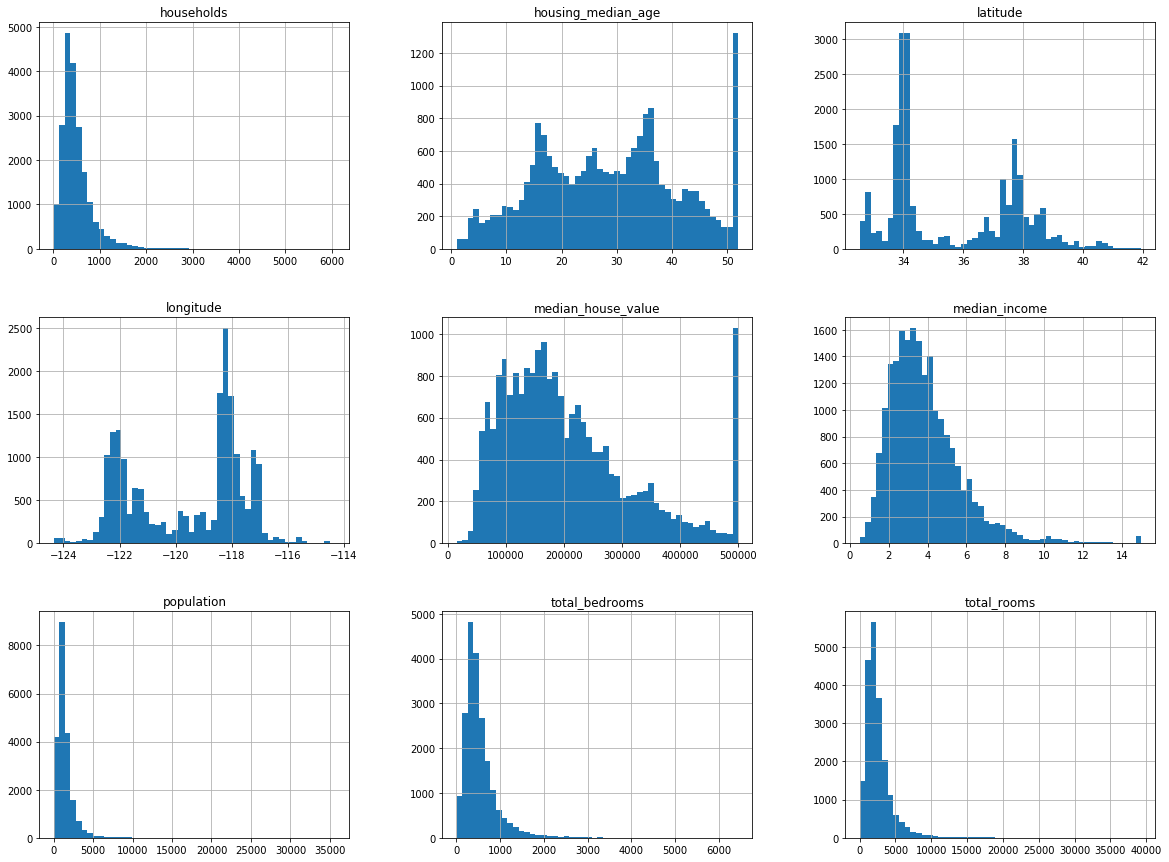

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
# plt.show()

In [104]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15961 to 235
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16349 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

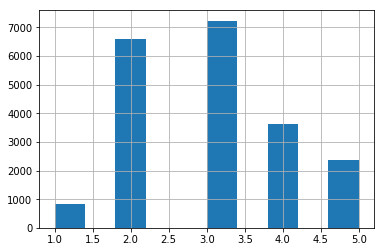

In [105]:
import numpy as np
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat']
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)
# pd.where() Where cond is True, keep the original value. 
# Where False, replace with corresponding value from other
data['income_cat'].hist()
data['income_cat'].value_counts()/len(data)

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit
# help(StratifiedShuffleSplit)
splt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_idx, test_idx in splt.split(data, data['income_cat']): # 按照后者分层抽样
    strat_train_set = data.loc[train_idx]
    strat_test_set = data.loc[test_idx]

# 查看分布
strat_train_set['income_cat'].value_counts()/len(strat_train_set)
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [107]:
for set in (strat_train_set, strat_test_set):
    set.drop('income_cat',axis=1, inplace=True)
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
11207,-117.92,33.83,52.0,1514.0,301.0,855.0,293.0,3.6042,166400.0,<1H OCEAN
9035,-117.84,34.63,5.0,6739.0,1251.0,4614.0,1266.0,4.0020,115100.0,INLAND
10482,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,330000.0,<1H OCEAN
13596,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,75000.0,INLAND


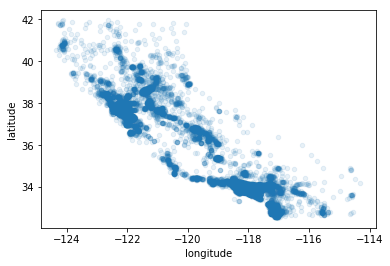

In [108]:
housing = strat_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

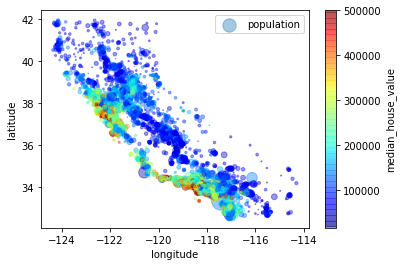

In [109]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100, label='population',
            c='median_house_value',cmap=plt.get_cmap('jet'))

In [110]:
corr_mat = housing.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924134,-0.111588,0.044415,0.070146,0.100851,0.055818,-0.013672,-0.043824
latitude,-0.924134,1.000000,0.015882,-0.034892,-0.066266,-0.107384,-0.069504,-0.082153,-0.146748
housing_median_age,-0.111588,0.015882,1.000000,-0.361921,-0.321678,-0.301220,-0.305833,-0.115020,0.107684
total_rooms,0.044415,-0.034892,-0.361921,1.000000,0.929588,0.859194,0.917847,0.198109,0.133566
total_bedrooms,0.070146,-0.066266,-0.321678,0.929588,1.000000,0.878086,0.979825,-0.007167,0.049941
population,0.100851,-0.107384,-0.301220,0.859194,0.878086,1.000000,0.907188,0.008148,-0.025008
households,0.055818,-0.069504,-0.305833,0.917847,0.979825,0.907188,1.000000,0.013529,0.065778
median_income,-0.013672,-0.082153,-0.115020,0.198109,-0.007167,0.008148,0.013529,1.000000,0.684828
median_house_value,-0.043824,-0.146748,0.107684,0.133566,0.049941,-0.025008,0.065778,0.684828,1.000000


In [111]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AE6774B00>,
      dtype=object)

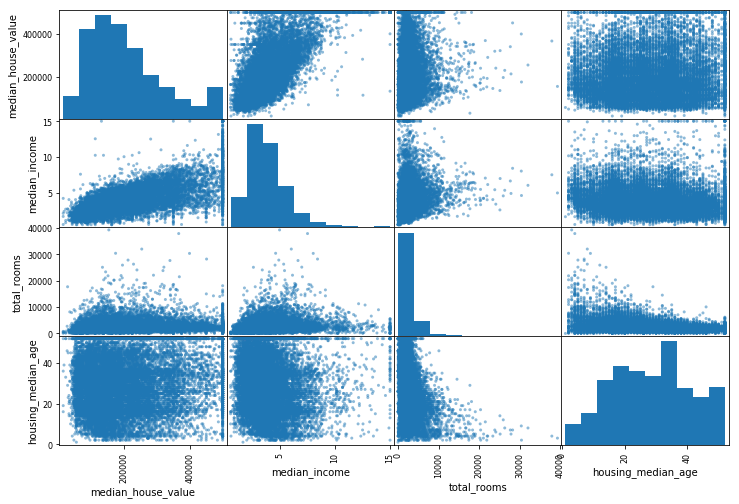

In [112]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))

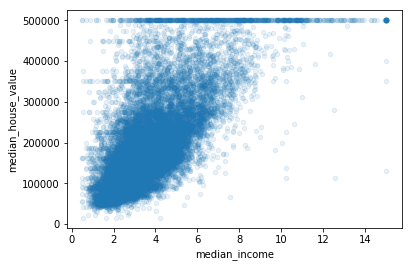

In [113]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [114]:
# 每家的房间数
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# 每家的卧室数量比
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# 每家的人口
housing["population_per_household"]=housing["population"]/housing["households"]
corr_mat = housing.corr()
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
Name: median_house_value, dtype: float64

In [115]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [116]:
# housing.dropna(subset=["total_bedrooms"])    # 选项1
# housing.drop("total_bedrooms", axis=1)       # 选项2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)    # 选项3

740       318.0
19529      63.0
8613      331.0
10142     226.0
15867     385.0
          ...  
11207     301.0
9035     1251.0
10482    1011.0
13596      11.0
1318      780.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [117]:
from sklearn.impute import SimpleImputer
impter = SimpleImputer(strategy='median')
# 数值属性才能计算中位数
housing_num = housing.drop('ocean_proximity',axis=1)
impter.fit(housing_num)
impter.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [118]:
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [119]:
X = impter.transform(housing_num)
type(X)

numpy.ndarray

In [120]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
type(housing_tr)

pandas.core.frame.DataFrame

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 只能对第一文本列，多文本列使用pd.factorize()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [122]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [123]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [131]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot
help(LabelBinarizer())

Help on LabelBinarizer in module sklearn.preprocessing._label object:

class LabelBinarizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
 |  
 |  Binarize labels in a one-vs-all fashion
 |  
 |  Several regression and binary classification algorithms are
 |  available in scikit-learn. A simple way to extend these algorithms
 |  to the multi-class classification case is to use the so-called
 |  one-vs-all scheme.
 |  
 |  At learning time, this simply consists in learning one regressor
 |  or binary classifier per class. In doing so, one needs to convert
 |  multi-class labels to binary labels (belong or does not belong
 |  to the class). LabelBinarizer makes this process easy with the
 |  transform method.
 |  
 |  At prediction time, one assigns the class for which the corresponding
 |  model gave the greatest confidence. LabelBinarizer makes this easy
 |  with the inverse_transform method.
 |  
 |  Read m

In [125]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-122.13, 37.67, 40.0, ..., 'NEAR BAY', 5.514195583596215,
        2.8832807570977916],
       [-120.98, 37.65, 40.0, ..., 'INLAND', 6.698412698412699,
        2.507936507936508],
       [-118.37, 33.87, 23.0, ..., '<1H OCEAN', 5.137640449438202,
        2.502808988764045],
       ...,
       [-117.69, 33.58, 5.0, ..., '<1H OCEAN', 6.80040733197556,
        2.9297352342158858],
       [-117.3, 34.1, 49.0, ..., 'INLAND', 4.615384615384615,
        5.846153846153846],
       [-121.77, 37.99, 4.0, ..., 'INLAND', 7.853351955307263,
        3.392458100558659]], dtype=object)

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attibs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.04435599,
        -0.01693693, -0.49175254],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.56563549,
        -0.05135459, -0.99646009],
       [ 0.59827896, -0.82368426, -0.45394013, ..., -0.12139949,
        -0.05182477, -0.5064297 ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.61053242,
        -0.01267723, -0.96392659],
       [ 1.13229471, -0.71606022,  1.61138426, ..., -0.35129083,
         0.25474742, -0.46992773],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  1.0740272 ,
         0.02975272, -1.15998515]])

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [138]:
# 报错参考 https://blog.csdn.net/jasonzhoujx/article/details/82025571
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('Simpleimputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',MyLabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])
# help(FeatureUnion)

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

In [139]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

somedata = housing.iloc[:5]
somelabel = housing_label.iloc[:5]
somedata_prepared = full_pipeline.transform(somedata)
print('predict:\t', lin_reg.predict(somedata_prepared))
print('Labels:\t',list(somelabel))

predict:	 [234956.84260842 303073.513104   327746.46204573 355932.30741583
 210220.50294171]
Labels:	 [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


In [140]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predict, housing_label)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68860.85279166883

In [142]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0